In [16]:
import numpy as np
from scipy import signal, stats
import matplotlib.pyplot as plt


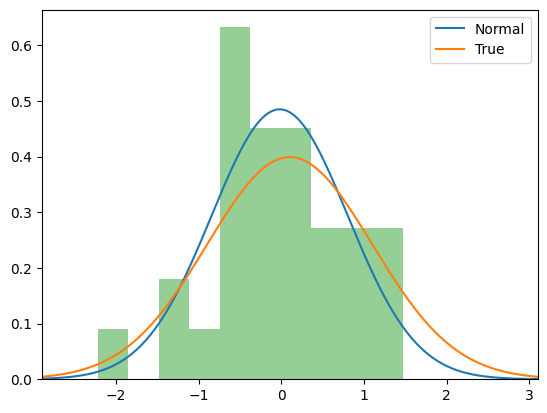

In [119]:
x = 0.1
sigma = 1
m = 30
rng = np.random.default_rng(0)

xs = rng.normal(x, sigma, m)
x_bar = np.mean(xs)
sigma_hat = np.std(xs, ddof=1)

ts = np.linspace(-5, 5, 1000)

plt.plot(ts, stats.norm.pdf(ts, x_bar, sigma_hat), label='Normal')
plt.plot(ts, stats.norm.pdf(ts, x, sigma), label='True')
plt.hist(xs, bins=10, density=True, alpha=0.5)

plt.legend()

plt.xlim(x -3 * sigma, x + 3 * sigma)
plt.show()

/var/folders/11/6tvn8zsd7ps02dw3jvvkg5840000gr/T/ipykernel_78731/1388829656.py:12: RuntimeWarning: invalid value encountered in divide
  cond_integrand = ts * dens * unif / conv


0.07638807887488906
0.061036035251033974
0.11241021360620157


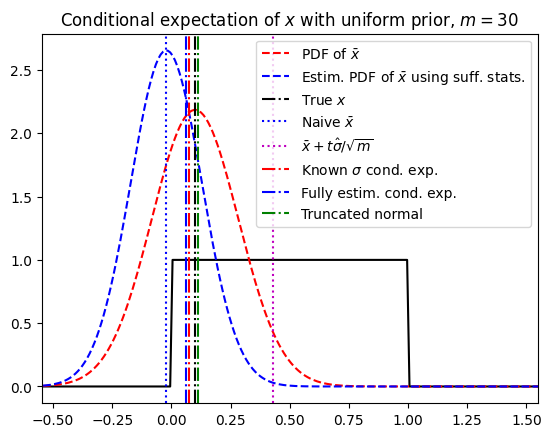

In [130]:
dens0 = stats.norm.pdf(ts, x, sigma / np.sqrt(m))
dens_hat = stats.norm.pdf(ts, x_bar, sigma_hat / np.sqrt(m))

unif = np.zeros_like(ts)
unif[(ts >= 0) & (ts <= 1)] = 1

dt = ts[1] - ts[0]
conv0 = signal.convolve(unif, stats.norm.pdf(ts, 0, sigma / np.sqrt(m)), mode='same') * dt
conv_hat = signal.convolve(unif, stats.norm.pdf(ts, 0, sigma_hat / np.sqrt(m)), mode='same') * dt

def x_hat_cond(dens, conv):
    cond_integrand = ts * dens * unif / conv
    cond_integrand[np.isnan(cond_integrand)] = 0
    return np.trapz(cond_integrand, ts)

dens0_unknown_mean = stats.norm.pdf(ts, x_bar, sigma / np.sqrt(m))
x_hat_cond0 = x_hat_cond(dens0_unknown_mean, conv0)
x_hat_cond_hat = x_hat_cond(dens_hat, conv_hat)

a = - x_bar / sigma_hat * np.sqrt(m)
b = (1 - x_bar) / sigma_hat * np.sqrt(m)
x_hat_trunc = stats.truncnorm.mean(a, b, loc=x_bar, scale=sigma_hat / np.sqrt(m))

print(x_hat_cond0)
print(x_hat_cond_hat)
print(x_hat_trunc)

plt.plot(ts, unif, color='k')
plt.plot(ts, dens0, color='r', linestyle='--', label='PDF of $\\bar{x}$')

plt.plot(ts, dens_hat, color='b', linestyle='--', label='Estim. PDF of $\\bar{x}$ using suff. stats.')
# plt.plot(ts, conv_hat, color='b', linestyle=':')

plt.axvline(x, color='k', linestyle='-.', label='True $x$')
plt.axvline(x_bar, color='b', linestyle=':', label='Naive $\\bar{x}$')
plt.axvline(x_bar + 3 * sigma_hat / np.sqrt(m), color='m', linestyle=':', label='$\\bar{x} + t \\hat{\\sigma} / \\sqrt{m}$')
plt.axvline(x_hat_cond0, color='r', linestyle='-.', label='Known $\sigma$ cond. exp.')
plt.axvline(x_hat_cond_hat, color='b', linestyle='-.', label='Fully estim. cond. exp.')
plt.axvline(x_hat_trunc, color='g', linestyle='-.', label='Truncated normal')
plt.xlim(-3 * sigma / np.sqrt(m), 1 + 3 * sigma / np.sqrt(m))

plt.title(f'Conditional expectation of $x$ with uniform prior, ${m=}$')
plt.legend()
plt.show()